## Script de preparação de dados do Trabalho de Conclusão
#### Curso de Especialização Lato Sensu em Ciência de Dados e Big Data
#### Instituição Pontifícia Universidade Católica de Minas Gerais
##### Título do trabalho: 'ANÁLISE DE SÉRIES TEMPORAIS PARA PREDIÇÃO DO PREÇO DE AÇÚCAR E ETANOL'
Autor: Rafael Vasconcelos Valadares <br>
Data: 17/05/2024 <br>
Email: rafaelvvaladares@hotmail.com <br>
Etapa: 2- Identificação e remoção de outliers não supervisionada com KMedoids

In [3]:
# Definindo o diretório de trabalho

import os

# Obtendo o diretório de trabalho atual
diretorio_atual=os.getcwd()

# Mudando o diretório de trabalho
novo_diretorio= 'C:/Users/rafae/OneDrive/Área de Trabalho/Github_projetos/TCC/TCC_CANA/Dados_prontos'
os.chdir(novo_diretorio)

In [4]:
#Listando arquivos presentes no diretório atual

arquivos=os.listdir(novo_diretorio)

# Imprimindo os nomes dos arquivos

for arquivo in arquivos:
    print(arquivo)

dataset_atualizada.xlsx
decomposição_serie_acucar_plot.png
decomposição_serie_etanol_plot.png
eda_geral.xlsx
eda_preços.png
serie_etanol_açúcar_plot.png


In [5]:
# Ativando bibliotecas

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
# Importando o dataset preparado na etapa anterior
import pandas as pd

dados=pd.read_excel('dataset_atualizada.xlsx')


In [7]:
colunas_remover=['data','safra', 'ano','mes','dia','ano_colheita']
X = dados.drop(columns=colunas_remover)
display(X)

,preco_etanol_real,preco_etanol_dolar,preco_acucar_real,preco_acucar_dolar,area_brasil,area_centro-oeste,area_centro-sul,area_nordeste,area_norte,area_norte/nordeste,...,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,etanol_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,1231.5,672.95,63.21,34.54,8485.000000,1504.11000,7359.79000,1083.220000,41.990,1125.210000,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
1,1239.5,677.69,63.38,34.65,8485.000000,1504.11000,7359.79000,1083.220000,41.990,1125.210000,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
2,1248.5,679.27,62.96,34.25,8485.000000,1504.11000,7359.79000,1083.220000,41.990,1125.210000,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
3,1259.0,679.07,62.90,33.93,8485.000000,1504.11000,7359.79000,1083.220000,41.990,1125.210000,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
4,1265.0,688.25,62.28,33.89,8485.000000,1504.11000,7359.79000,1083.220000,41.990,1125.210000,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,2968.0,571.10,140.08,26.95,8292.725995,1767.47359,7369.90872,875.539275,47.278,922.817275,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763
2604,2969.5,573.59,141.65,27.36,8292.725995,1767.47359,7369.90872,875.539275,47.278,922.817275,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763
2605,2971.5,575.43,141.65,27.36,8292.725995,1767.47359,7369.90872,875.539275,47.278,922.817275,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763
2606,2973.0,562.64,136.69,25.87,8292.725995,1767.47359,7369.90872,875.539275,47.278,922.817275,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763


In [8]:
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Determinando o número ótimo de klusters usando o método Elbow
#!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmedoids = KMedoids(n_clusters=n, random_state=42)
        kmedoids.fit(X_scaled)
        wcss.append(kmedoids.inertia_)

    return wcss
wcss = calculate_wcss(X_scaled)

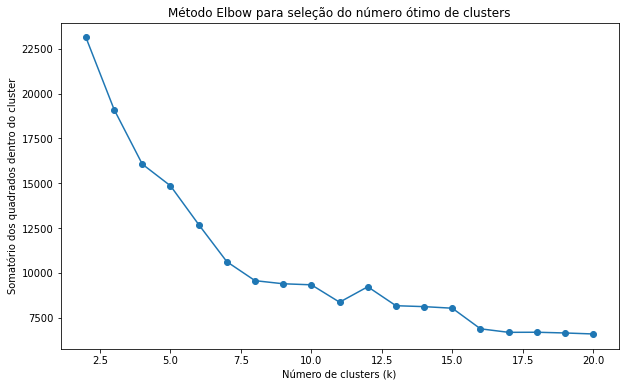

In [10]:
# Plotando para identificação do ponto de Elbow
import matplotlib.pyplot as plt 
plt.figure(figsize =(10,6))
plt.plot(range(2,21), wcss, marker ='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Somatório dos quadrados dentro do cluster')
plt.title('Método Elbow para seleção do número ótimo de clusters')
plt.show()

In [11]:
# Fórmula par cálculo do k ótimo
import numpy as np

def k_otimo(wcss):
    distances = []
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[-1]

    for i in range(len(wcss)):
        x0 = i + 2
        y0 = wcss[i]
        numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
        denominator = np.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)
        distances.append(numerator / denominator)

    return distances.index(max(distances)) + 2

In [12]:
n_otimo=k_otimo(wcss)
print(n_otimo)

8


In [13]:
# Ajustando o kluster K-means

KMedoids = KMedoids(n_clusters = n_otimo, random_state = 42)
KMedoids.fit(X_scaled)

KMedoids(random_state=42)

In [14]:
# Calculando a distância de cada ponto em relação a seu centro do cluster

distances = np.min(KMedoids.transform(X_scaled), axis = 1)

In [42]:
# Definindo o limite
import numpy as np
threshold = np.median(distances) + 2*np.std(distances)

In [43]:
# Identificando os outliers
outliers = distances > threshold

In [44]:
print(f'Número de outliers detectados: {np.sum(outliers)}')

Número de outliers detectados: 87


In [45]:
print(f'Indices dos outliers: {np.where(outliers)[0]}')

Indices dos outliers: [ 368  369  370  371  372  373  374  375  376  377  378  379  380  381
  382  383  384  385  386  387  388  964  965  966  967  969  970  971
  972  973  974  975  976 2407 2408 2409 2410 2411 2412 2413 2416 2417
 2418 2419 2420 2421 2422 2423 2424 2425 2426 2427 2428 2429 2430 2431
 2432 2433 2434 2435 2436 2437 2438 2439 2440 2441 2446 2447 2448 2449
 2450 2451 2452 2453 2454 2455 2456 2457 2458 2459 2460 2461 2462 2463
 2464 2465 2466]


In [46]:
print(f'Dados outliers: \n {X[outliers]}')

Dados outliers: 
       preco_etanol_real  preco_etanol_dolar  preco_acucar_real  \
368              1021.0              443.33              44.25   
369              1021.5              448.22              44.31   
370              1021.5              444.13              44.47   
371              1021.0              444.11              44.06   
372              1018.5              440.91              43.87   
...                 ...                 ...                ...   
2462             3373.0              699.65             131.80   
2463             3331.5              692.48             131.88   
2464             3270.0              686.83             130.79   
2465             3239.5              683.73             130.02   
2466             3172.5              667.75             130.92   

      preco_acucar_dolar  area_brasil  area_centro-oeste  area_centro-sul  \
368                19.21  8811.430000         1710.75000       7734.84000   
369                19.44  8811.4300

In [47]:
#Visualizando os outliers

import matplotlib.pyplot as plt

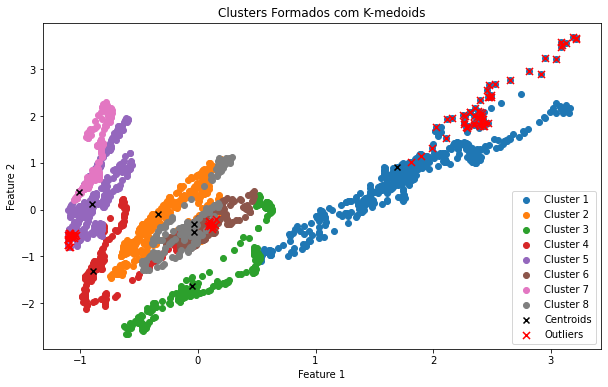

In [51]:

# Visualize the formed clusters
plt.figure(figsize=(10, 6))

for cluster_label in range(n_otimo):
    plt.scatter(X_scaled[KMedoids.labels_ == cluster_label, 0], X_scaled[KMedoids.labels_ == cluster_label, 1], label=f'Cluster {cluster_label+1}')

plt.scatter(KMedoids.cluster_centers_[:, 0], KMedoids.cluster_centers_[:, 1], marker='x', color='black', label='Centroids')
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], marker='x', color='red', label='Outliers', s = 50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters Formados com K-medoids')
plt.legend()
plt.show()

In [49]:
# Evaluate clustering with Davies-Bouldin Index and Calinski-Harabasz Index
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
db_index = davies_bouldin_score(X_scaled, KMedoids.labels_)
ch_index = calinski_harabasz_score(X_scaled, KMedoids.labels_)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")

Davies-Bouldin Index: 0.6600423859040068
Calinski-Harabasz Index: 2188.6190475910585


Davies-Bouldin Index (DB Index): Lower values indicate better clustering. A DB Index of 0.66 suggests reasonably good clustering. <br>
Calinski-Harabasz Index (CH Index): Higher values indicate better clustering. A CH Index of 2188.62 suggests well-defined clusters. <br>

In [52]:
# Conjunto de dados sem outliers
df_sem_outliers = dados[~outliers]
display(df_sem_outliers)

,data,safra,ano,mes,dia,preco_etanol_real,preco_etanol_dolar,preco_acucar_real,preco_acucar_dolar,ano_colheita,...,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,etanol_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,2012-01-03,2012/13,2012,1,3,1231.5,672.95,63.21,34.54,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
1,2012-01-04,2012/13,2012,1,4,1239.5,677.69,63.38,34.65,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
2,2012-01-05,2012/13,2012,1,5,1248.5,679.27,62.96,34.25,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
3,2012-01-06,2012/13,2012,1,6,1259.0,679.07,62.90,33.93,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
4,2012-01-09,2012/13,2012,1,9,1265.0,688.25,62.28,33.89,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,2022-12-21,2022/23,2022,12,21,2968.0,571.10,140.08,26.95,2022,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763
2604,2022-12-22,2022/23,2022,12,22,2969.5,573.59,141.65,27.36,2022,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763
2605,2022-12-23,2022/23,2022,12,23,2971.5,575.43,141.65,27.36,2022,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763
2606,2022-12-27,2022/23,2022,12,27,2973.0,562.64,136.69,25.87,2022,...,220959253,64131,9524284,60459290,4.970,3.840,4.770,1,1,26.919763


In [54]:
# Exportando o conjunto de dados

df_sem_outliers.to_excel('df_sem_outliers.xlsx', index=False)